### atexit - Call functions when a program is closing down

**Purpose**:Register function(s) to be called when a program is closing down.

**Available In**:2.1.3 and later

The atexit module provides a simple interface to register functions to be called(调用) when a program closes down normally. The sys module also provides a hook, `sys.exitfunc`, but only one function can be registered there. The atexit registry can be used by multiple modules and libraries simultaneously.

Example:

Terminal:    
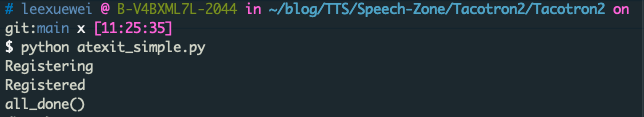

It is also possible to register more than one function, and to pass arguments. That can be useful to cleanly disconnect from databases(断开与数据的连接), remove temporary files, etc. Since it is possible to pass arguments to the registered functions, we don’t even need to keep a separate list of things to clean up – we can just register a clean up function more than once.

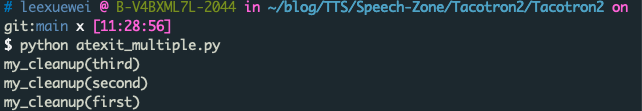

### When are atexit functions not called?

The callbacks registered with atexit are not invoked if(如果出现以下情况，则不会调用使用 atexit 注册的回调):

- the program dies because of a signal

- os.\_exit() is invoked directly

- a Python fatal error is detected (in the interpreter)

To illustrate a program being killed via a signal, we can modify one of the examples from the `subprocess` article. There are 2 files involved, the parent and the child programs. The parent starts the child, pauses, then kills it:

待完成



In [3]:
import atexit
import json
from datetime import datetime
from threading import Thread
from urllib.request import Request, urlopen

_format = '%Y-%m-%d %H:%M:%S.%f'
_file = None
_run_name = None
_slack_url = None

def init(filename, run_name, slack_url=None):
    global _file, _run_name, _slack_url
    _close_logfile()
    _file = open(filename, 'a')
    _file = open(filename, 'a')
    _file.write('\n-----------------------------------------------------------------\n')
    _file.write('Starting new {} training run\n'.format(run_name))
    _file.write('-----------------------------------------------------------------\n')
    _run_name = run_name
    _slack_url = slack_url
    
def _close_logfile():
    global _file
    if _file is not None:
        _file.close()
        _file = None
        
def _send_slack(msg):
    req = Request(_slack_url)
    req.add_header('Content-Type', 'application/json')
    urlopen(req, json.dumps({
            'username': 'tacotron',
            'icon_emoji': ':taco',
            'text': f'{_run_name}: {msg}',
    }).encode())
    
def log(msg, end='\n', slack=False):
    print(msg, end=end)
    if _file is not None:
        _file.write(f'[{datetime.now().strftime(_format)[:-3]}]  {msg}\n')
    if slack and _slack_url is not None:
        Thread(target=_send_slack, args=(msg,)).start()
        
atexit.register(_close_logfile)

<function __main__._close_logfile()>